# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

#%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (9,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,Besni
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,Besni
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,Besni
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,Besni


In [3]:
df.rename(columns={column : column.lower() for column in df.columns}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             900 non-null    int64  
 1   majoraxislength  900 non-null    float64
 2   minoraxislength  900 non-null    float64
 3   eccentricity     900 non-null    float64
 4   convexarea       900 non-null    int64  
 5   extent           900 non-null    float64
 6   perimeter        900 non-null    float64
 7   class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
majoraxislength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
minoraxislength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
convexarea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [6]:
df.isnull().sum()

area               0
majoraxislength    0
minoraxislength    0
eccentricity       0
convexarea         0
extent             0
perimeter          0
class              0
dtype: int64

In [7]:
df.columns

Index(['area', 'majoraxislength', 'minoraxislength', 'eccentricity',
       'convexarea', 'extent', 'perimeter', 'class'],
      dtype='object')

In [8]:
df["class"].value_counts()

# Balanced Data

class
Kecimen    450
Besni      450
Name: count, dtype: int64

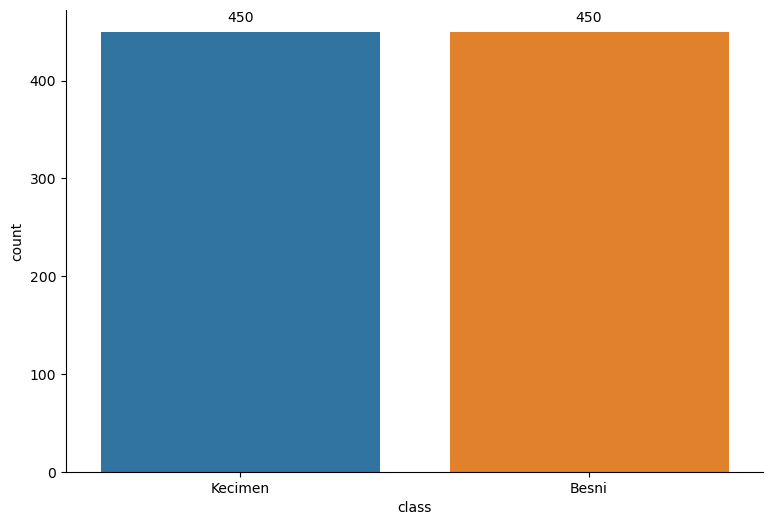

In [9]:
ax = sns.countplot(x=df["class"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

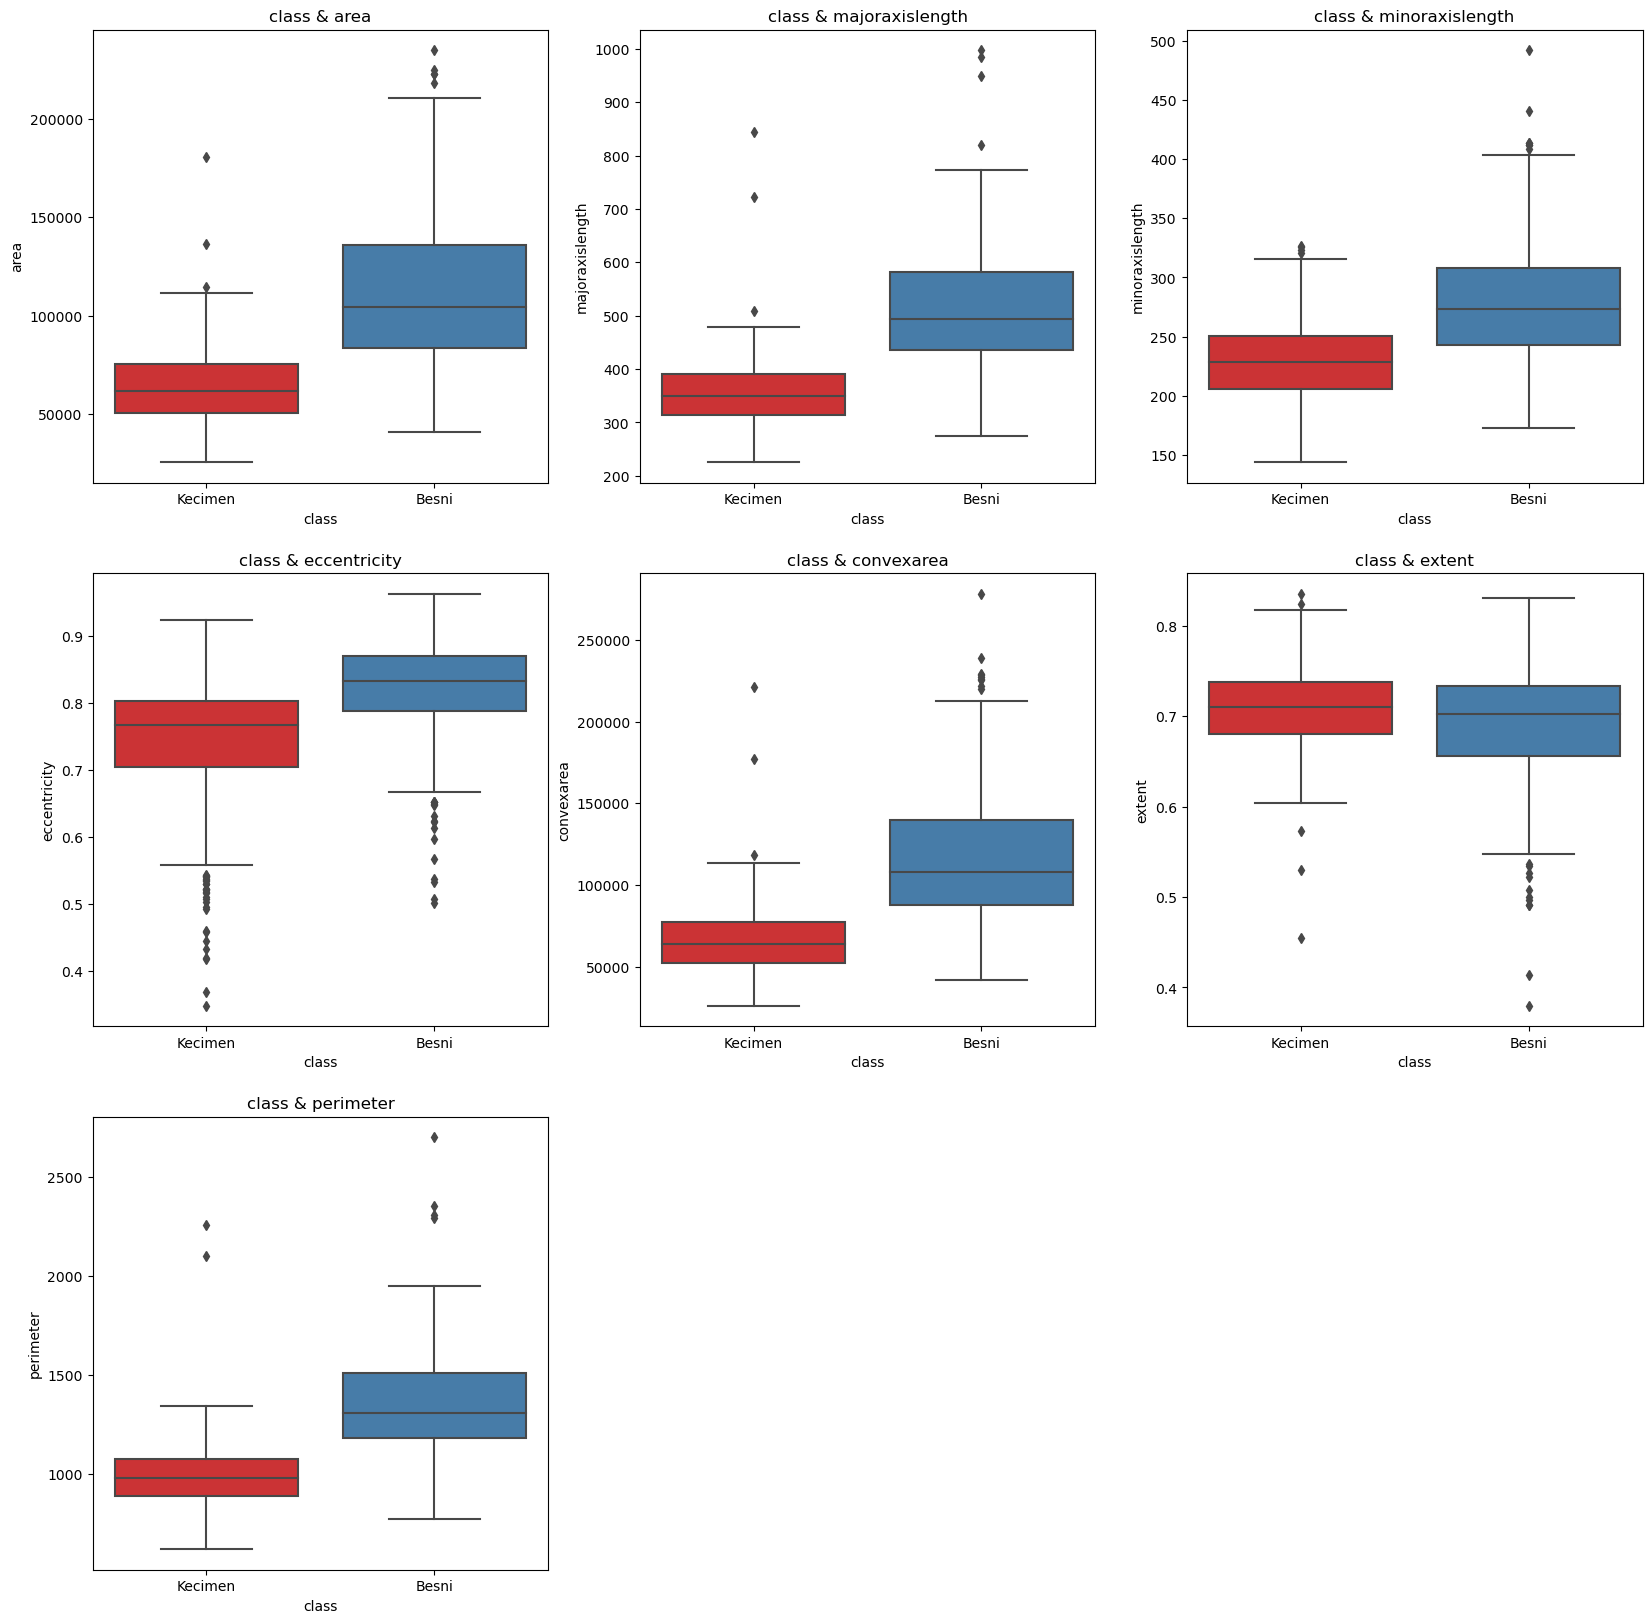

In [10]:
index = 0
plt.figure(figsize=(20,20))
for column in df.columns:
    if column != "class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='class',y=column, data=df, palette='Set1')
        plt.title(f'class & {column}')
plt.show()

In [11]:
df["class"] = df["class"].map({"Kecimen":0,"Besni":1})

# mapping Kecimen as 0, Besni as 1

In [12]:
df

,area,majoraxislength,minoraxislength,eccentricity,convexarea,extent,perimeter,class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,0
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,0
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,0
3,45928,286.541,208.760,0.685,47336,0.700,844.162,0
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,1
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,1
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,1
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,1


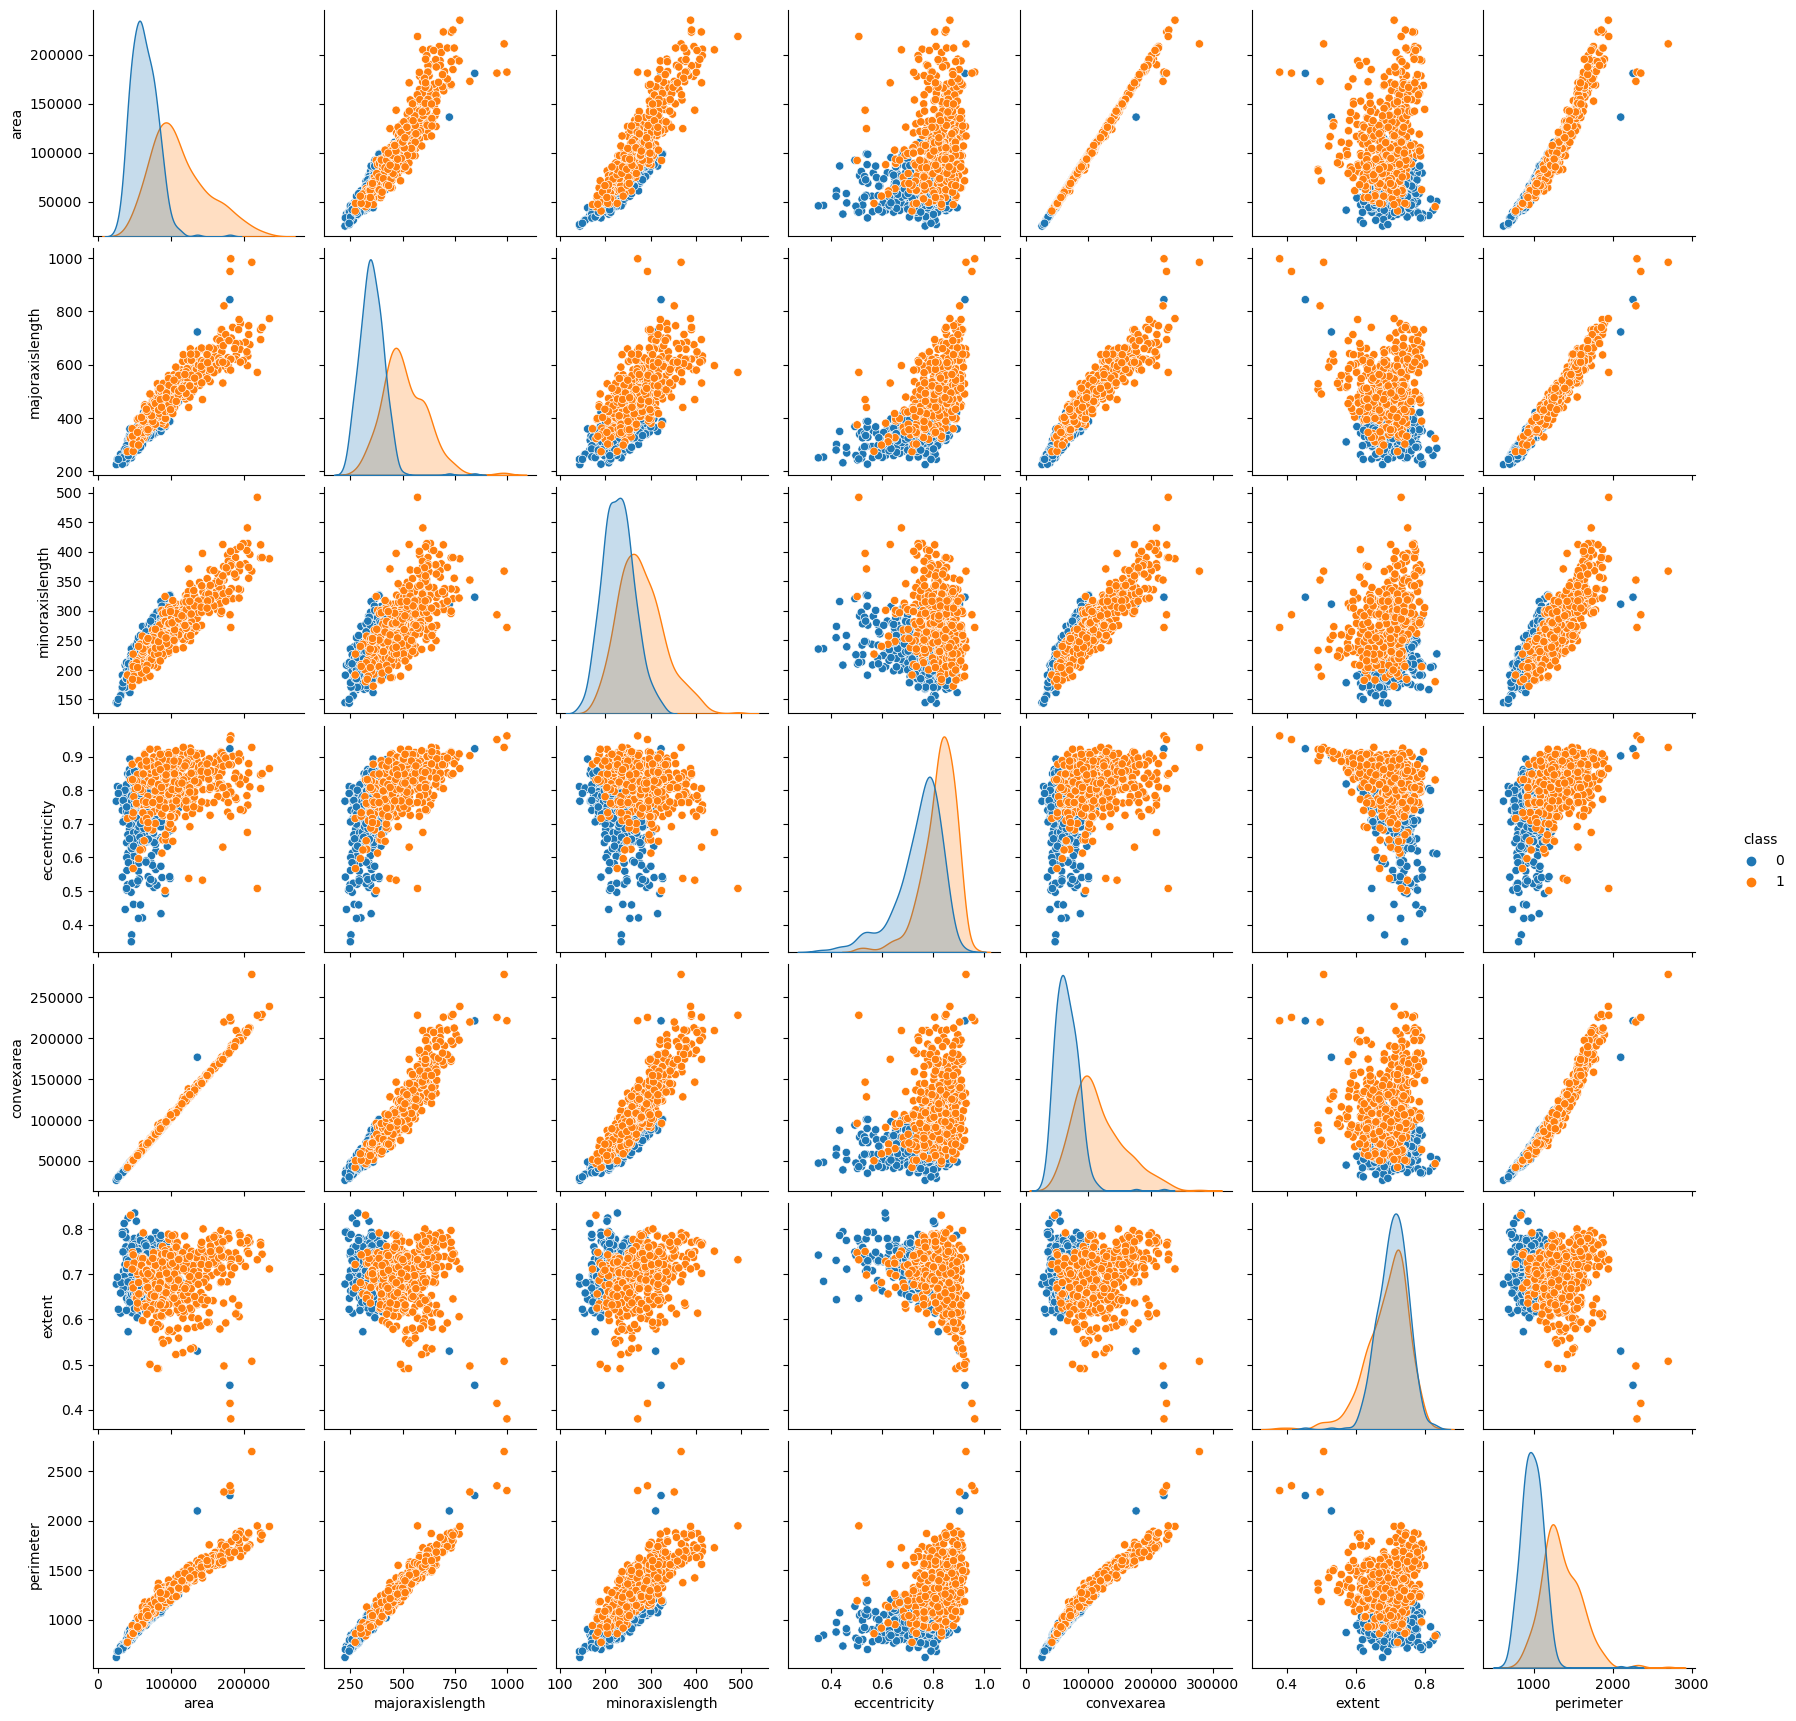

In [13]:
sns.pairplot(data=df, hue="class");

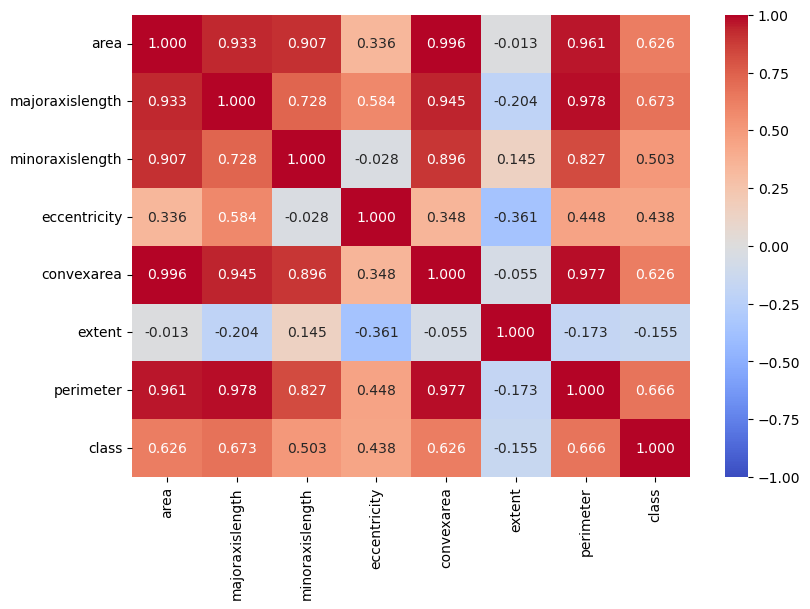

In [14]:
sns.heatmap(df.select_dtypes(include='number').corr(),vmin=-1,vmax=1, annot=True, fmt='.3f', cmap='coolwarm');

In [15]:
multiCorr = df.select_dtypes("number").corr()
print(multiCorr.shape)
multiCorr = multiCorr.loc[((multiCorr > .89) & (multiCorr < 1)).any(axis=1),
                          ((multiCorr > .89) & (multiCorr < 1)).any()]
print(multiCorr.shape)

(8, 8)
(5, 5)


In [17]:
multiCorr.style.set_properties(
    color="#00cc00", **{
        "background-color": "#00ff00"
    }
).applymap(
    lambda v:
    "font-size:25px; color:green; selector:td:hover, props:[(color, yellow)}"
    if v > .89 and v < 1 else "background-color:#370073").set_table_styles([{
        "selector":
        "td:hover",
        "props": [("color", "#9c337f"), ("font-size", "23px"),
                  ("font-weight", "bold")]
    }, {
        "selector":
        "th:hover",
        "props": [("color", "#9c337f"), ("font-weight", "bold")]
    }])

,area,majoraxislength,minoraxislength,convexarea,perimeter
area,1.000000,0.932774,0.906650,0.995920,0.961352
majoraxislength,0.932774,1.000000,0.728030,0.945031,0.977978
minoraxislength,0.906650,0.728030,1.000000,0.895651,0.827417
convexarea,0.995920,0.945031,0.895651,1.000000,0.976612
perimeter,0.961352,0.977978,0.827417,0.976612,1.000000


## Train | Test Split and Scaling

In [21]:
X = df.drop("class", axis = 1)
y = df["class"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [24]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (765, 7)
Train target shape   :  (765,)
Test features shape  :  (135, 7)
Test target shape    :  (135,)


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [31]:
steps = [("Scaler", StandardScaler()), ("log_model", LogisticRegression())]

In [32]:
Pipeline(steps = steps)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [33]:
log_pipe = Pipeline(steps=steps)

In [34]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [35]:
y_pred = log_pipe.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1], dtype=int64)

In [37]:
np.set_printoptions(suppress = True)
y_pred_proba = log_pipe.predict_proba(X_test)
y_pred_proba

array([[0.22388969, 0.77611031],
       [0.77910751, 0.22089249],
       [0.98038965, 0.01961035],
       [0.03742157, 0.96257843],
       [0.97940613, 0.02059387],
       [0.53383431, 0.46616569],
       [0.98534741, 0.01465259],
       [0.48847718, 0.51152282],
       [0.66536638, 0.33463362],
       [0.66858712, 0.33141288],
       [0.27565697, 0.72434303],
       [0.02538435, 0.97461565],
       [0.01121799, 0.98878201],
       [0.80976644, 0.19023356],
       [0.00144234, 0.99855766],
       [0.00603057, 0.99396943],
       [0.36325295, 0.63674705],
       [0.99020297, 0.00979703],
       [0.62369756, 0.37630244],
       [0.29641328, 0.70358672],
       [0.83477667, 0.16522333],
       [0.00513299, 0.99486701],
       [0.92533991, 0.07466009],
       [0.89758696, 0.10241304],
       [0.0086294 , 0.9913706 ],
       [0.82789067, 0.17210933],
       [0.45161332, 0.54838668],
       [0.01283031, 0.98716969],
       [0.38123166, 0.61876834],
       [0.00051623, 0.99948377],
       [0.

In [38]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data

,area,majoraxislength,minoraxislength,eccentricity,convexarea,extent,perimeter,class
70,95347,451.526,280.226,0.784,99256,0.675,1255.245,0
827,61861,345.944,235.430,0.733,67390,0.702,1063.621,1
231,52693,283.504,242.114,0.520,54860,0.738,895.745,0
588,112808,542.505,267.202,0.870,116961,0.743,1390.400,1
39,49882,287.264,222.186,0.634,50880,0.766,843.764,0
...,...,...,...,...,...,...,...,...
582,146420,598.073,314.391,0.851,149403,0.747,1531.955,1
743,102944,477.168,277.222,0.814,108053,0.716,1339.098,1
363,103377,460.670,287.993,0.780,105569,0.727,1230.233,0
65,59370,345.949,221.922,0.767,61464,0.697,981.517,0


In [39]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,area,majoraxislength,minoraxislength,eccentricity,convexarea,extent,perimeter,class,pred_proba
70,95347,451.526,280.226,0.784,99256,0.675,1255.245,0,0.776
827,61861,345.944,235.430,0.733,67390,0.702,1063.621,1,0.221
231,52693,283.504,242.114,0.520,54860,0.738,895.745,0,0.020
588,112808,542.505,267.202,0.870,116961,0.743,1390.400,1,0.963
39,49882,287.264,222.186,0.634,50880,0.766,843.764,0,0.021
...,...,...,...,...,...,...,...,...,...
582,146420,598.073,314.391,0.851,149403,0.747,1531.955,1,0.992
743,102944,477.168,277.222,0.814,108053,0.716,1339.098,1,0.895
363,103377,460.670,287.993,0.780,105569,0.727,1230.233,0,0.735
65,59370,345.949,221.922,0.767,61464,0.697,981.517,0,0.158


In [40]:
test_data["pred"] = y_pred
test_data

,area,majoraxislength,minoraxislength,eccentricity,convexarea,extent,perimeter,class,pred_proba,pred
70,95347,451.526,280.226,0.784,99256,0.675,1255.245,0,0.776,1
827,61861,345.944,235.430,0.733,67390,0.702,1063.621,1,0.221,0
231,52693,283.504,242.114,0.520,54860,0.738,895.745,0,0.020,0
588,112808,542.505,267.202,0.870,116961,0.743,1390.400,1,0.963,1
39,49882,287.264,222.186,0.634,50880,0.766,843.764,0,0.021,0
...,...,...,...,...,...,...,...,...,...,...
582,146420,598.073,314.391,0.851,149403,0.747,1531.955,1,0.992,1
743,102944,477.168,277.222,0.814,108053,0.716,1339.098,1,0.895,1
363,103377,460.670,287.993,0.780,105569,0.727,1230.233,0,0.735,1
65,59370,345.949,221.922,0.767,61464,0.697,981.517,0,0.158,0


## Model Performance

### Cross Validate

### GridSearchCV

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

# Conclusion 